# Construction Firm EDA

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn import metrics

### Reading CSV Data as DataFrame

In [5]:
df = pd.read_csv('Construction_Firms_Data.csv', index_col=0)
df.head()

,Rank_2019,Rank_2018,Firm,Firm_Type,Total_2018_Revenue($ MILL.)
0,1,1,"BECHTEL, Reston, Va.",EC,6594.0
1,2,2,"AECOM, Los Angeles, Calif.",EAC,3693.5
2,3,3,"JACOBS, Dallas, Texas",EAC,2189.7
3,4,6,"JLL, Chicago, Ill.",CM,1880.0
4,5,4,"PARSONS CORP., Centreville, Va.",EC,1591.4


### Cleaning, Manipulating and Exploring Data

In [6]:
df.isnull().sum()

Rank_2019                      0
Rank_2018                      0
Firm                           0
Firm_Type                      0
Total_2018_Revenue($ MILL.)    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank_2019                    100 non-null    int64  
 1   Rank_2018                    100 non-null    object 
 2   Firm                         100 non-null    object 
 3   Firm_Type                    100 non-null    object 
 4   Total_2018_Revenue($ MILL.)  100 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.7+ KB


### Splitting Firm_Name column into Firm_Name, Headquaters, State code 

In [8]:
temp = df["Firm"].str.split(",", n = 2, expand = True)
df['Firm_Name'] = temp[0]
df['Headquaters'] = temp[1]
df['State'] = temp[2]

In [9]:
df = df.drop('Firm', axis=1)

In [10]:
df

,Rank_2019,Rank_2018,Firm_Type,Total_2018_Revenue($ MILL.),Firm_Name,Headquaters,State
0,1,1,EC,6594.0,BECHTEL,Reston,Va.
1,2,2,EAC,3693.5,AECOM,Los Angeles,Calif.
2,3,3,EAC,2189.7,JACOBS,Dallas,Texas
3,4,6,CM,1880.0,JLL,Chicago,Ill.
4,5,4,EC,1591.4,PARSONS CORP.,Centreville,Va.
...,...,...,...,...,...,...,...
95,96,95,CM,12.4,CAMPUS CONSTRUCTION MGMT.,Pittsford,N.Y.
96,97,**,C,12.3,INFINITE CONSULTING CORP.,Hicksville,N.Y.
97,98,**,CM,11.8,FULCRUM LLC,Scottsdale,Ariz.
98,99,**,CM,11.1,O’CONNOR CONSTRUCTION MGMT. INC.,Irvine,Calif.


### Handling "**" values and datatype in DataFrame 

In [11]:
df['Rank_2018'].replace("**",0, inplace=True)

In [12]:
df['Rank_2018'].replace("** ",0, inplace=True)

In [13]:
df['Rank_2019'].replace("**",0, inplace=True)

In [14]:
df['Rank_2019'] = pd.to_numeric(df['Rank_2019'])

In [15]:
df['Rank_2018'] = pd.to_numeric(df['Rank_2018'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank_2019                    100 non-null    int64  
 1   Rank_2018                    100 non-null    int64  
 2   Firm_Type                    100 non-null    object 
 3   Total_2018_Revenue($ MILL.)  100 non-null    float64
 4   Firm_Name                    100 non-null    object 
 5   Headquaters                  100 non-null    object 
 6   State                        100 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ KB


### Exploratory Data Analysis 

#### Sectors with highest revenue in millions($)

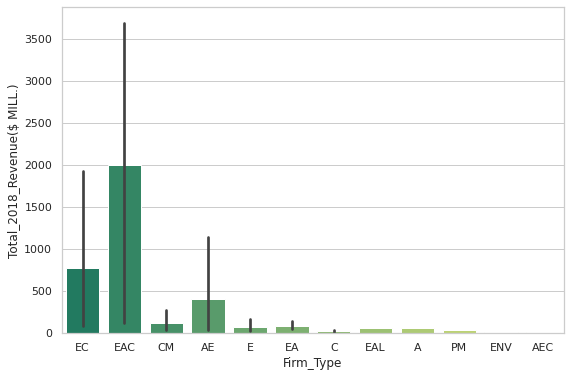

In [17]:
plt.figure(figsize=(9,6))
sns.set_theme(style="whitegrid")
sns.barplot(data=df, x='Firm_Type', y='Total_2018_Revenue($ MILL.)', palette='summer')
             

#### Creating a column target with respect to the increase in Rank from 2018 to 2019. If the Rank from 2019 is higher than the Rank in 2018 then assigning boolean 1, else assigning 0. Target == 1 if the Firm is worth considering for investment and Target == 0 if it is NOT worth considering.

In [18]:
df['Target'] = np.where(df['Rank_2019'] <= df['Rank_2018'], 1,0)

#### Relationship of Target with respect to the features

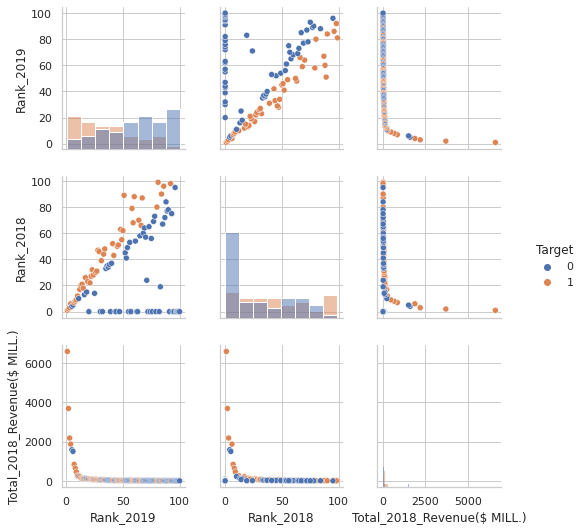

In [19]:
sns.pairplot(df, hue="Target", diag_kind="hist")

#### U.S States with highest revenue

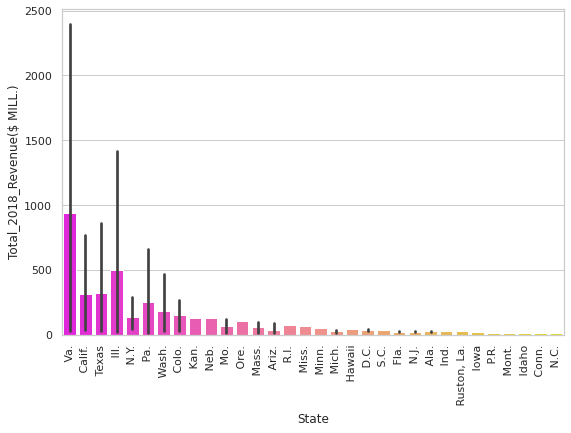

In [20]:
plt.figure(figsize=(9,6))
plt.xticks(rotation=90)
sns.barplot(data=df, x='State', y='Total_2018_Revenue($ MILL.)', palette='spring')

In [24]:
df['Total_2018_Revenue($ MILL.)'].unique()

array([6594. , 3693.5, 2189.7, 1880. , 1591.4, 1508.1,  846.6,  657.4,
        466.4,  271. ,  235. ,  224.9,  153.3,  127.5,  126.2,  125.4,
        123.1,  120.5,  106.5,  103.5,   99.4,   91.1,   87. ,   86.3,
         77.4,   71.9,   67.2,   64.6,   63.8,   60.8,   60.7,   58.3,
         57.6,   50. ,   45.6,   45.4,   44.6,   42.1,   40.5,   40.4,
         35. ,   34.6,   34.2,   33.8,   33.7,   33.4,   33.1,   31.6,
         31. ,   30.7,   30.5,   30.1,   29.3,   28. ,   27.3,   27.2,
         27.1,   27. ,   25.4,   25.2,   25. ,   24.7,   23. ,   22.9,
         22.7,   22.1,   21.2,   20.3,   20. ,   19.8,   18.5,   17.9,
         16.7,   16.2,   16. ,   15.9,   15.6,   15.4,   14.9,   14.1,
         13.6,   13. ,   12.8,   12.4,   12.3,   11.8,   11.1])

## Implementing Multinomial Naive-Bayes

#### Initializing Features (Rank 2019 & Total Revenue in 2018)

In [28]:
X = df[['Rank_2019','Total_2018_Revenue($ MILL.)']]
y = df['Target']

#### Initializing model 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

accuracy:   0.800
[[11  0]
 [ 4  5]]


#### Creating an object for the classifier

In [32]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

#### Pickling for deployment

In [ ]:
import pickle
pickle.dump(nb, open('modell.pkl','wb'))